# Figure 3: Intersection of errors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

import smpsite as smp

%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/envs/notebook/share/proj failed


In [2]:
df = pd.read_csv('../../outputs/fig3d_5000sim_summary.csv')
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,3.007371,2.812011,1.817102,3.984293,5.972956,1.591223,11.575765,1.963166,...,20,5,50,30.0,0.0,0.06,G,NaN,True,5000
1,1,0,1.674369,1.572390,0.992247,2.215238,3.343781,0.893670,3.601998,4.063939,...,100,1,50,30.0,0.0,0.00,G,NaN,vandamme,5000
2,2,0,5.944138,5.464739,3.456442,7.867387,11.994503,3.282057,46.102518,10.720174,...,20,5,50,30.0,0.0,0.30,G,NaN,False,5000
3,3,0,3.132695,2.916515,1.863807,4.135228,6.335359,1.695366,12.687471,33.488342,...,100,1,50,30.0,0.0,0.20,G,NaN,False,5000
4,4,0,1.879239,1.752972,1.139824,2.499530,3.687284,0.999187,4.529712,4.391926,...,100,1,50,30.0,0.0,0.10,G,NaN,True,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,181,0,5.895170,5.429353,3.436594,7.788003,11.850008,3.244385,45.276954,7.106347,...,20,5,50,30.0,0.0,0.38,G,NaN,vandamme,5000
182,182,0,3.113708,2.942645,1.862477,4.105940,6.106538,1.637183,12.375009,2.090176,...,20,5,50,30.0,0.0,0.24,G,NaN,True,5000
183,183,0,2.543727,2.365439,1.538118,3.382425,4.994684,1.353327,8.301677,24.887777,...,100,1,50,30.0,0.0,0.12,G,NaN,False,5000
184,184,0,10.411591,9.415827,5.874237,13.914665,21.893309,6.225964,147.156100,28.764447,...,20,5,50,30.0,0.0,0.54,G,NaN,False,5000


In [3]:
df_true     = df[(df.n0==5) & (df.ignore_outliers=="True")].sort_values(by="outlier_rate")
df_false    = df[(df.n0==1) & (df.ignore_outliers=="False")].sort_values(by="outlier_rate")
df_vandamme = df[(df.n0==1) & (df.ignore_outliers=="vandamme")].sort_values(by="outlier_rate")

In [4]:
df_true["error_kappa_theoretical"] = df_true.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                        n0=row.n0 * (1 - row.outlier_rate), 
                                                                                        kappa_within_site=row.kappa_within_site,
                                                                                        site_lat=row.site_lat,
                                                                                        site_long=row.site_long, 
                                                                                        outlier_rate=0.0, 
                                                                                        secular_method=row.secular_method, 
                                                                                        kappa_secular=row.kappa_secular)), axis=1, result_type='expand')

df_vandamme["error_kappa_theoretical"] = df_vandamme.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                            n0=row.n0, 
                                                                                            kappa_within_site=row.kappa_within_site,
                                                                                            site_lat=row.site_lat,
                                                                                            site_long=row.site_long, 
                                                                                            outlier_rate=row.outlier_rate, 
                                                                                            secular_method=row.secular_method, 
                                                                                            kappa_secular=row.kappa_secular)), axis=1, result_type='expand')

df_true["error_angle_theoretical"] = df_true.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)
df_vandamme["error_angle_theoretical"] = df_vandamme.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)

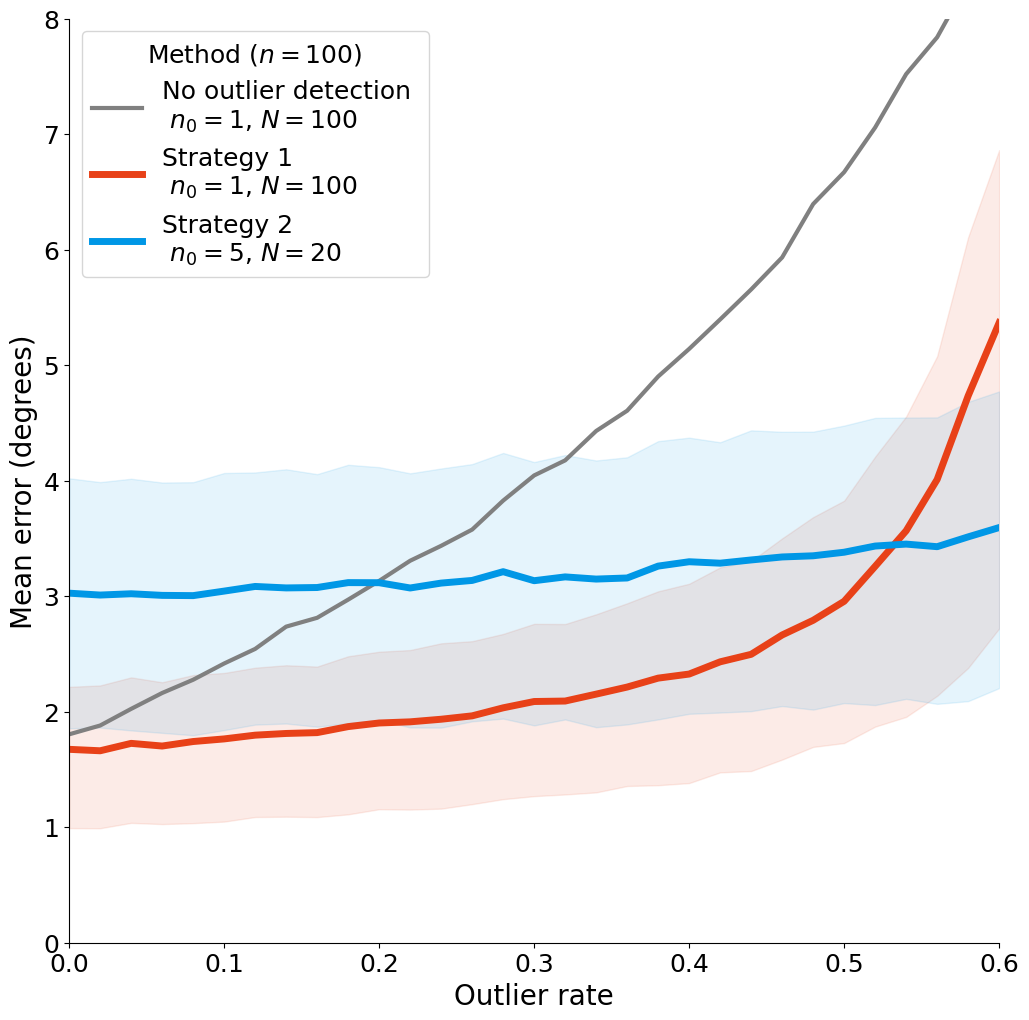

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

#sns.lineplot(ax=ax, data=df, x="outlier_rate", y="error_angle_mean", hue="ignore_outliers", lw=5, palette=["#e84118", "#0097e6"])

sns.lineplot(ax=ax, data=df_false, x="outlier_rate", y="error_angle_mean", lw=3, label="No outlier detection \n $n_0=1$, $N=100$", color='grey')
sns.lineplot(ax=ax, data=df_vandamme,  x="outlier_rate", y="error_angle_mean", lw=5, label="Strategy 1 \n $n_0=1$, $N=100$", color="#e84118")
sns.lineplot(ax=ax, data=df_true,  x="outlier_rate", y="error_angle_mean", lw=5, label="Strategy 2 \n $n_0=5$, $N=20$", color="#0097e6")

# sns.lineplot(ax=ax, data=df_vandamme,  x="outlier_rate", y="error_angle_theoretical", lw=2, label="Vandamme Theory", color="#e84118")
# sns.lineplot(ax=ax, data=df_true,  x="outlier_rate", y="error_angle_theoretical", lw=2, label="Perfect detection ($n_0=5$)", color="#0097e6")

plt.fill_between(df_vandamme.outlier_rate, df_vandamme.error_angle_25, df_vandamme.error_angle_75, color="#e84118", alpha=0.1)
plt.fill_between(df_true.outlier_rate, df_true.error_angle_25, df_true.error_angle_75, color="#0097e6", alpha=0.1)

plt.xlabel("Outlier rate", fontsize=20)
plt.ylabel("Mean error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(np.arange(0, 0.70, 0.1), fontsize=18)
plt.xlim(0, 0.6)
plt.ylim(0, 8)

plt.legend(title="Method ($n=100$)", loc="upper left", fontsize=18, title_fontsize=18)#, labels=["Strategy 1 ($n_0=1$)", "Strategy 2 ($n_0=5$)"])
ax.spines[['right', 'top']].set_visible(False)

# plt.savefig("Figure3d.pdf", format="pdf", bbox_inches='tight')
# plt.savefig("Figure3d.png", format="png", bbox_inches='tight')